In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5161.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_4769.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1443.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5261.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-392.jpg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5266.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_2134.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_991.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1548.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-176.jpg
/ka

In [44]:
 import os

directory = '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train'

def explore_directory(directory):
    if not os.path.exists(directory):
        print(f"The directory {directory} does not exist.")
        return
    print(f"Exploring contents of: {directory}\n")  
    num_dirs = 0
    num_files = 0
    dir_details = []
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            num_dirs += 1
            num_files_in_dir = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
            dir_details.append((item, num_files_in_dir))
        elif os.path.isfile(item_path):
            num_files += 1
    print(f"Summary:\n- Total directories: {num_dirs}\n- Total files: {num_files}\n")
    if dir_details:
        print("Directory details:")
        for dir_name, file_count in dir_details:
            print(f"  - {dir_name}: {file_count} files")
    else:
        print("No subdirectories found.")
    
    root_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    if root_files:
        print("\nFiles in the root directory:")
        for file in root_files:
            print(f"  - {file}")
    else:
        print("\nNo files in the root directory.")

explore_directory(directory)

Exploring contents of: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train

Summary:
- Total directories: 5
- Total files: 0

Directory details:
  - Tuberculosis: 1220 files
  - Bacterial Pneumonia: 1205 files
  - Corona Virus Disease: 1218 files
  - Normal: 1207 files
  - Viral Pneumonia: 1204 files

No files in the root directory.


In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from PIL import Image
from pathlib import Path
import numpy as np

# Directory paths for train, validation, and test sets
dataset = Path('/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset')
train_dir = '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train'
val_dir = '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val'
test_dir = '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test'

# Image dimensions
img_height = 224
img_width = 224
RANDOM_SEED = 42

<Figure size 1000x600 with 0 Axes>

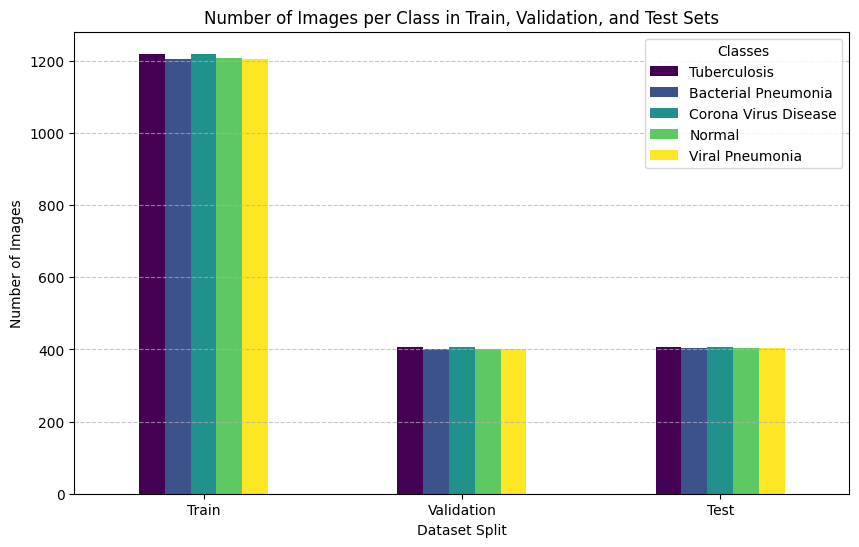

,Tuberculosis,Bacterial Pneumonia,Corona Virus Disease,Normal,Viral Pneumonia
Train,1220,1205,1218,1207,1204
Validation,406,401,406,402,401
Test,408,403,407,404,403


In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset directories
train_dir = "../input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
val_dir = "../input/lungs-disease-dataset-4-types/Lung Disease Dataset/val"
test_dir = "../input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"

# Function to count images per class
def count_images(directory):
    class_counts = {}
    if os.path.exists(directory):
        for class_name in os.listdir(directory):
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):
                class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get image counts
train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

# Combine into DataFrame
df_counts = pd.DataFrame({"Train": train_counts, "Validation": val_counts, "Test": test_counts}).T.fillna(0).astype(int)

# Plot dataset distribution
plt.figure(figsize=(10, 6))
df_counts.plot(kind="bar", stacked=False, colormap="viridis", figsize=(10, 6))
plt.title("Number of Images per Class in Train, Validation, and Test Sets")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.legend(title="Classes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display dataset class counts
df_counts


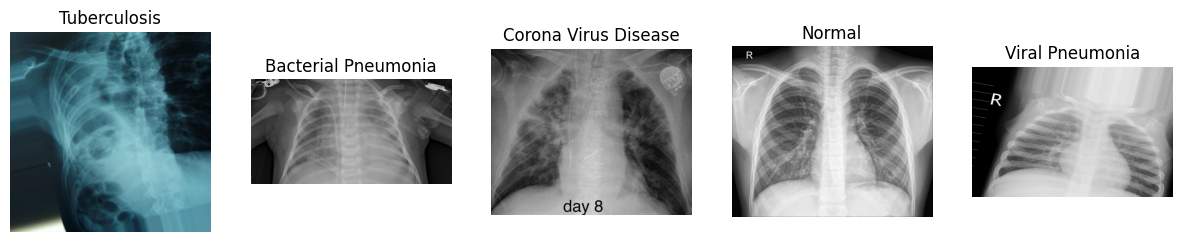

In [47]:
import cv2
import numpy as np

# Function to display sample images
def display_sample_images(directory):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Adjust if needed
    classes = os.listdir(directory)

    for i, cls in enumerate(classes[:5]):  # Display up to 5 classes
        class_path = os.path.join(directory, cls)
        img_path = np.random.choice(os.listdir(class_path))
        img = cv2.imread(os.path.join(class_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(cls)
        axes[i].axis("off")

    plt.show()

# Call function for training set
display_sample_images(str(train_dir))


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

IMG_SIZE = 224

# MobileNetV2 preprocessing function
def mobilenet_preprocess(img):
    return preprocess_input(img)  # Converts to [-1, 1]

# Train data generator (with augmentation)
train_datagen = ImageDataGenerator(
    preprocessing_function=mobilenet_preprocess,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation & Test data generator (NO augmentation, only preprocessing)
val_test_datagen = ImageDataGenerator(preprocessing_function=mobilenet_preprocess)

# Load datasets
train_gen = train_datagen.flow_from_directory(
    '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No shuffling for test set
)

Found 6054 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


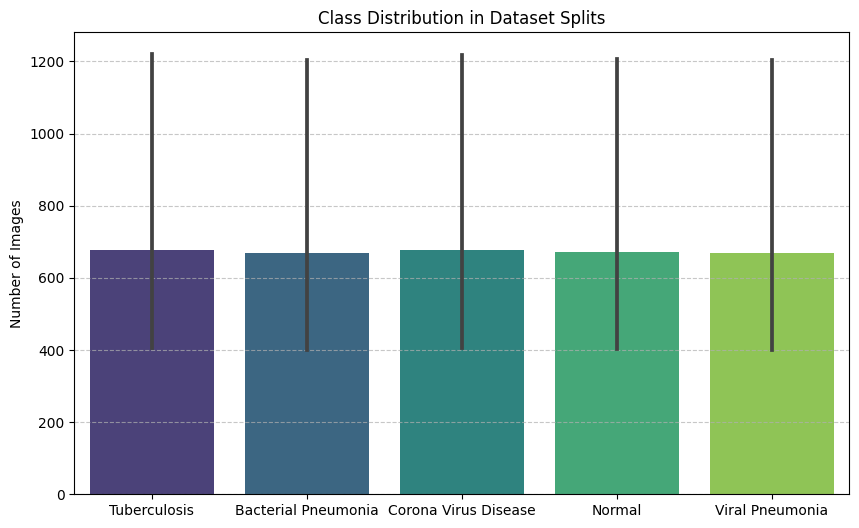

In [49]:
#Class Imbalance Analysis

import seaborn as sns
import pandas as pd

# Create DataFrame for counts
df_counts = pd.DataFrame({
    "Train": train_counts,
    "Validation": val_counts,
    "Test": test_counts
}).T.fillna(0).astype(int)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_counts, palette="viridis")
plt.title("Class Distribution in Dataset Splits")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


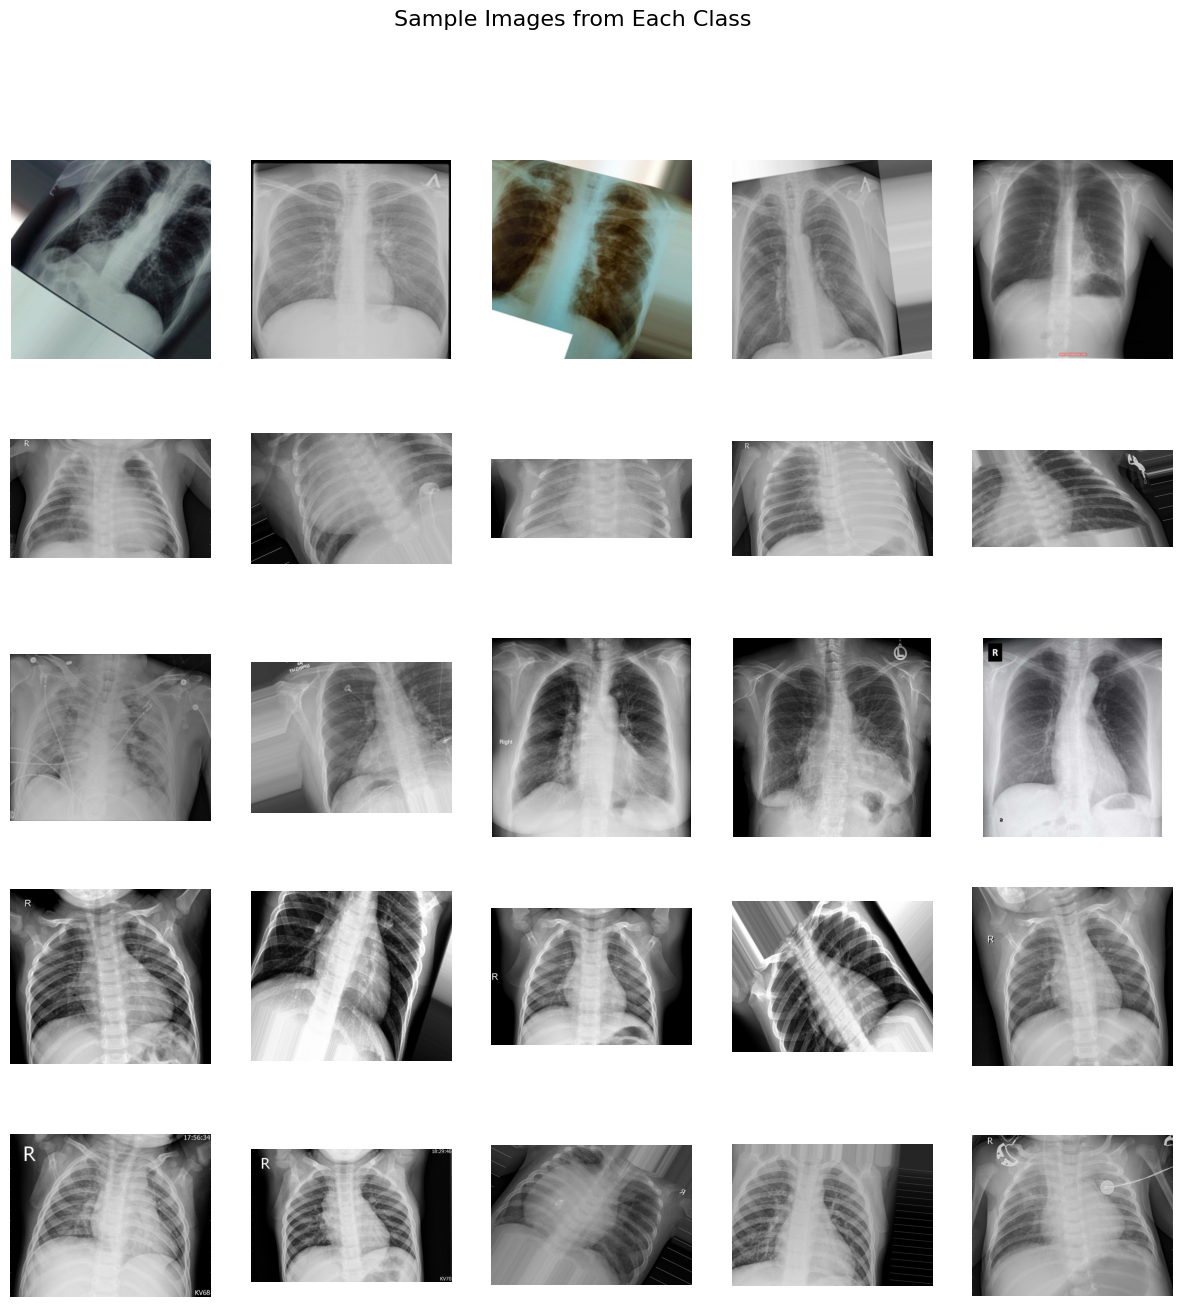

In [50]:
#Sample Image Montage (Per Class)
import cv2
import random
import numpy as np

def plot_class_samples(directory):
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # (rows, cols)

    for i, cls in enumerate(os.listdir(directory)):
        class_path = os.path.join(directory, cls)
        images = os.listdir(class_path)
        selected_images = random.sample(images, min(5, len(images)))  # Select 5 random images

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis("off")

        axes[i, 0].set_ylabel(cls, fontsize=14)

    plt.suptitle("Sample Images from Each Class", fontsize=16)
    plt.show()

plot_class_samples(str(train_dir))


In [51]:
# Print class indices to ensure they match in training and testing
print("Training class indices:", train_gen.class_indices)
print("Testing class indices:", test_gen.class_indices)

Training class indices: {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1, 'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}
Testing class indices: {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1, 'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}


In [8]:
# # Load dataset path
# train = '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train'
# test='/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test'
# validation='/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val'
# total_train_images = count_images_in_directory(os.path.join(dataset_dir, 'train'))
# total_val_images = count_images_in_directory(os.path.join(dataset_dir, 'val'))
# total_test_images = count_images_in_directory(os.path.join(dataset_dir, 'test'))



In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [53]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [54]:
fine_tune_from = int(len(base_model.layers) * 0.7)  
for layer in base_model.layers[:fine_tune_from]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_from:]:
    layer.trainable = True


In [59]:
from tensorflow.keras.models import Sequential

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
# x = Dropout(0.5)(x)
# predictions = Dense(5, activation='softmax', kernel_regularizer=l2(0.0001))(x)  # Adjust class count if needed

# # Create model
# model = Model(inputs=base_model.input, outputs=predictions)


# Add classifier head with L2 regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax', kernel_regularizer=l2(0.0001))(x)  # Adjust class count if needed

# Create model

model = Model(inputs=base_model.input, outputs=predictions)

In [60]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [61]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,492,549 (13.32 MB)

 Trainable params: 2,395,141 (9.14 MB)

 Non-trainable params: 1,097,408 (4.19 MB)

In [63]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,  
    restore_best_weights=True
)


lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce LR by half
    patience=3,  # Wait for 3 epochs without improvement
    min_lr=1e-6
)


In [64]:
callbacks = [early_stopping, lr_scheduler]

In [65]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
pochs=40,
    batch_size=32,
    verbose=2,
    callbacks=callbacks
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


190/190 - 141s - 745ms/step - accuracy: 0.7194 - loss: 0.7733 - val_accuracy: 0.7921 - val_loss: 0.5326 - learning_rate: 1.0000e-04
Epoch 2/40
190/190 - 126s - 665ms/step - accuracy: 0.8226 - loss: 0.4814 - val_accuracy: 0.8612 - val_loss: 0.3923 - learning_rate: 1.0000e-04
Epoch 3/40
190/190 - 125s - 660ms/step - accuracy: 0.8432 - loss: 0.4341 - val_accuracy: 0.8385 - val_loss: 0.4749 - learning_rate: 1.0000e-04
Epoch 4/40
190/190 - 125s - 658ms/step - accuracy: 0.8579 - loss: 0.3811 - val_accuracy: 0.8395 - val_loss: 0.4488 - learning_rate: 1.0000e-04
Epoch 5/40
190/190 - 126s - 663ms/step - accuracy: 0.8647 - loss: 0.3638 - val_accuracy: 0.8415 - val_loss: 0.4773 - learning_rate: 1.0000e-04
Epoch 6/40
190/190 - 125s - 655ms/step - accuracy: 0.8821 - loss: 0.3316 - val_accuracy: 0.8869 - val_loss: 0.3356 - learning_rate: 5.0000e-05
Epoch 7/40
190/190 - 124s - 653ms/step - accuracy: 0.8888 - loss: 0.3121 - val_accuracy: 0.8770 - val_loss: 0.3712 - learning_rate: 5.0000e-05
Epoch 8/40

In [68]:
model.save('model_mobilenet_tuned.h5')
model.save('model_lung.keras')

model.save_weights('model_mobilenet_new3_lung.weights.h5')

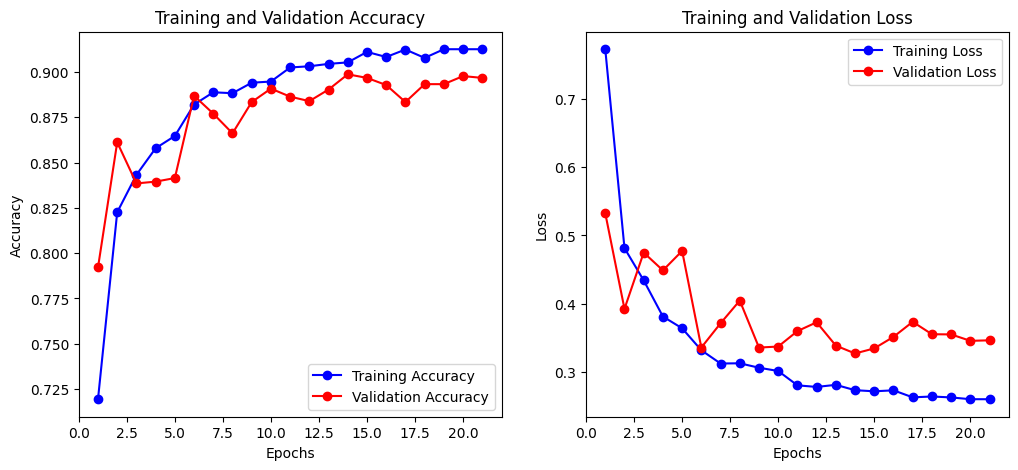

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Plot training & validation accuracy and loss

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Call the function to plot graphs
plot_training_history(history)

# Function to plot confusion matrix

64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step


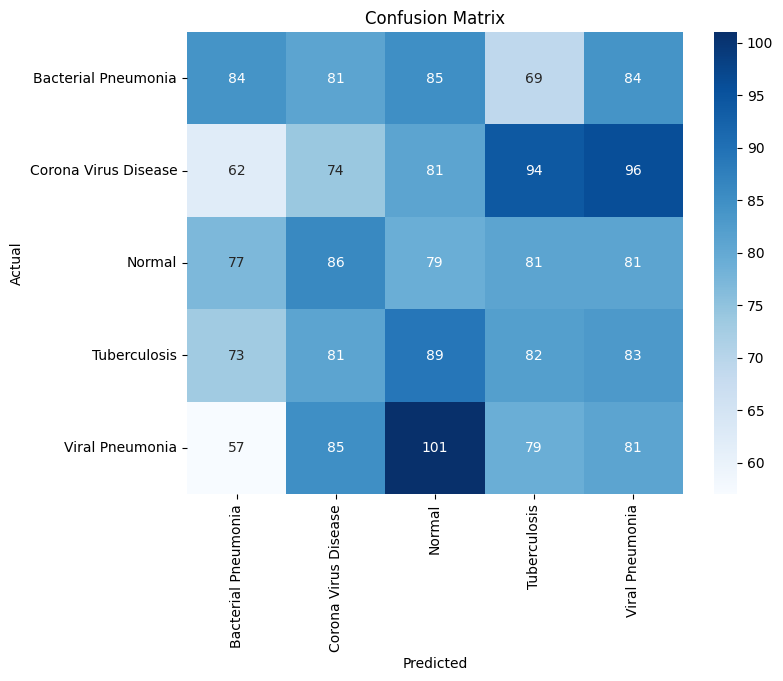

                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.24      0.21      0.22       403
Corona Virus Disease       0.18      0.18      0.18       407
              Normal       0.18      0.20      0.19       404
        Tuberculosis       0.20      0.20      0.20       408
     Viral Pneumonia       0.19      0.20      0.20       403

            accuracy                           0.20      2025
           macro avg       0.20      0.20      0.20      2025
        weighted avg       0.20      0.20      0.20      2025



In [70]:
#confusion_matrix
def plot_confusion_matrix(model, val_generator):
    y_true = val_generator.classes
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    class_labels = list(val_generator.class_indices.keys())
    
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print classification report
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Call function to plot confusion matrix
plot_confusion_matrix(model, val_gen)

In [74]:
from tensorflow.keras.models import load_model

# Load your trained CNN model
model = load_model('/kaggle/working/model_lung.keras')  # Update with your model path


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 30 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size & batch size
img_size = (224, 224)  # Update if needed
batch_size = 32  # Adjust based on your setup

# Load test images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get true labels from test set
y_true = test_generator.classes  # True labels
class_names = list(test_generator.class_indices.keys())  # Class names


Found 2025 images belonging to 5 classes.


In [76]:
import numpy as np

# Get predicted probabilities
y_pred_proba = model.predict(test_generator)  # Shape: (num_samples, num_classes)


64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step


In [77]:
from sklearn.preprocessing import label_binarize

# Binarize the true labels for ROC curve
y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))


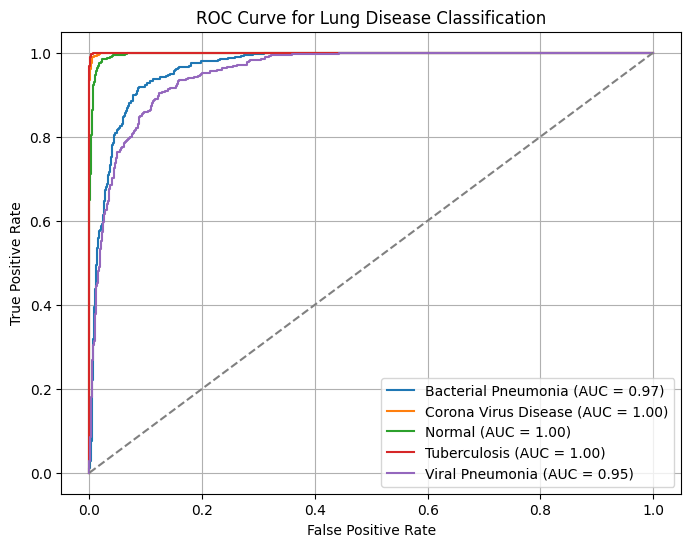

In [78]:
#ROC Curve & AUC Score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Lung Disease Classification")
plt.legend()
plt.grid()
plt.show()


<Figure size 1000x500 with 0 Axes>

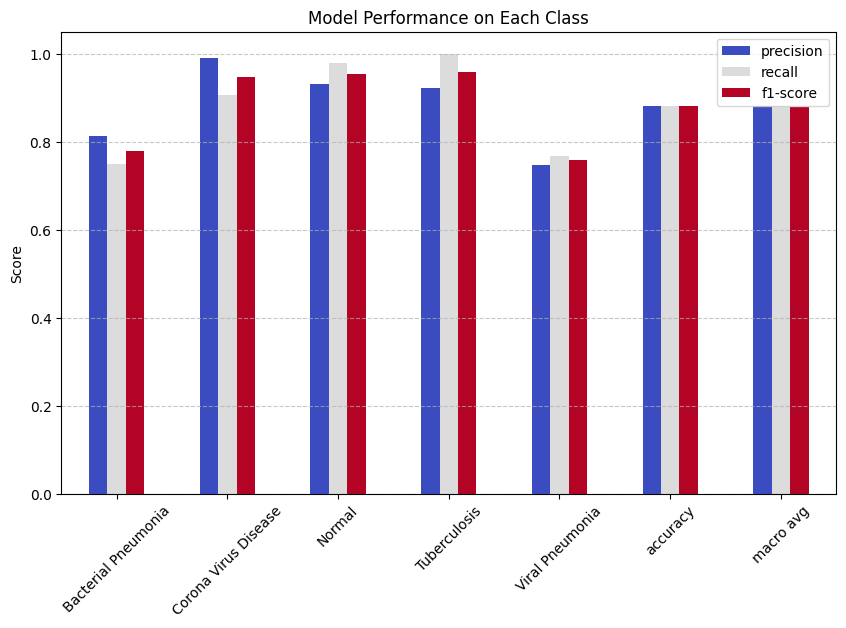

In [39]:
#Model Performance on Each Class

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)  # Get class with highest probability
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).T.iloc[:-1, :3]  # Remove "accuracy" row

# Plot Performance Metrics
plt.figure(figsize=(10, 5))
df_report.plot(kind="bar", colormap="coolwarm", figsize=(10, 6))
plt.title("Model Performance on Each Class")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [41]:
for layer in model.layers:
    print(layer.name)


mobilenet_1.00_224
global_average_pooling2d
dense
dropout
dense_1


In [80]:
import tensorflow as tf
print(tf.__version__)

2.17.1
